LAB-04:Principal Component Analysis (PCA)

* Created Date: 09.03.2024
* Created By: Blessy Louis(2348416)
* edited on: 09.03.2024

# **Importing necessary packages for Analysis:**

* Pandas: Is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data.
* Numpy:NumPy enhances Python's mathematical operations on arrays and matrices by providing a powerful data structure, a vast library of high-level functions, and efficient calculations.
* matplotlib.pyplot: Matplotlib is an amazing visualization library in Python for 2D plots of arrays. Matplotlib is a multi-platform data visualization library built on NumPy arrays.Matplotlib consists of several plots like line, bar, scatter, histogram, etc.
* seaborn:Python Seaborn library is a widely popular data visualization library that is commonly used for data science and machine learning tasks. You build it on top of the matplotlib data visualization library and can perform exploratory analysis.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset:**

 this Loan Status Prediction dataset, we have the data of applicants who previously applied for the loan based on the property which is a Property Loan.
The bank will decide whether to give a loan to the applicant based on some factors such as Applicant Income, Loan Amount, previous Credit History, Co-applicant Income, etc…

About the loan_data.csv file:

* Loan_ID: A unique loan ID.
* Gender: Either male or female.
* Married: Weather Married(yes) or Not Marttied(No).
* Dependents: Number of persons depending on the client.
* Education: Applicant Education(Graduate or Undergraduate).
* Self_Employed: Self-employed (Yes/No).
* ApplicantIncome: Applicant income.
* CoapplicantIncome: Co-applicant income.
* LoanAmount: Loan amount in thousands.
* Loan_Amount_Term: Terms of the loan in months.
* Credit_History: Credit history meets guidelines.
* Property_Area: Applicants are living either Urban, Semi-Urban or Rural.
* Loan_Status: Loan approved (Y/N).


In [ ]:
df=pd.read_csv('loan_data.csv')
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001003    Male     Yes          1      Graduate            No   
1    LP001005    Male     Yes          0      Graduate           Yes   
2    LP001006    Male     Yes          0  Not Graduate            No   
3    LP001008    Male      No          0      Graduate            No   
4    LP001013    Male     Yes          0  Not Graduate            No   
..        ...     ...     ...        ...           ...           ...   
376  LP002953    Male     Yes         3+      Graduate            No   
377  LP002974    Male     Yes          0      Graduate            No   
378  LP002978  Female      No          0      Graduate            No   
379  LP002979    Male     Yes         3+      Graduate            No   
380  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               4583             1508.0       128.0             360.0   
1               3000                0.0        66.0             360.0   
2               2583             2358.0       120.0             360.0   
3               6000                0.0       141.0             360.0   
4               2333             1516.0        95.0             360.0   
..               ...                ...         ...               ...   
376             5703                0.0       128.0             360.0   
377             3232             1950.0       108.0             360.0   
378             2900                0.0        71.0             360.0   
379             4106                0.0        40.0             180.0   
380             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Rural           N  
1               1.0         Urban           Y  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
376             1.0         Urban           Y  
377             1.0         Rural           Y  
378             1.0         Rural           Y  
379             1.0         Rural           Y  
380             0.0     Semiurban           N  

[381 rows x 13 columns]

## **Displaying first 5 rows of the dataset**

In [ ]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001005   Male     Yes          0      Graduate           Yes   
2  LP001006   Male     Yes          0  Not Graduate            No   
3  LP001008   Male      No          0      Graduate            No   
4  LP001013   Male     Yes          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0       128.0             360.0   
1             3000                0.0        66.0             360.0   
2             2583             2358.0       120.0             360.0   
3             6000                0.0       141.0             360.0   
4             2333             1516.0        95.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Rural           N  
1             1.0         Urban           Y  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

Displaying the first 5 rows from the dataset

LP001003: This column appears to be an identifier or some form of unique code for each entry in the dataset.

Gender: This column likely indicates the gender of the individual. In this case, it seems to indicate that the individual is male.

Has_Credit: This column could represent a binary variable, possibly indicating whether the individual has a credit history. In this case, it appears to be marked as "Yes."

Dependents: This column might indicate the number of dependents the individual has. In this case, it's marked as "1", suggesting the individual has one dependent.

Education: This column likely indicates the educational level of the individual. In this case, it indicates that the individual is a graduate.

Self_Employed: This column likely represents whether the individual is self-employed or not. In this case, it's marked as "No," suggesting the individual is not self-employed.

ApplicantIncome: This appears to be a numerical value, representing the income of the individual.

CoapplicantIncome: Another numerical value, representing the income of the co-applicant, if applicable.

LoanAmount: Yet another numerical value, representing the amount of the loan applied for.

Loan_Amount_Term: Another numerical value, representing the term or duration of the loan in months.

Credit_History: This numerical value could represent a binary variable indicating the credit history of the individual.

Property_Area: This likely indicates the location or residency status of the individual, specifying that they reside in a rural area.

Loan_Status: This column could represent the outcome of the loan application, whether it was approved or not. In this case, it's marked as "N," possibly suggesting the loan application was not approved.

In [ ]:
df.shape

(381, 13)

Clearly the  dataset has 381 rows and 13 columns

Data Description: Features in the data

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Checking for null values

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

clearly , we see that the dataset may have some null values

Removing the null values

In [ ]:
df1=df.dropna()
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Displaying the information about the data

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            308 non-null    object 
 1   Gender             308 non-null    object 
 2   Married            308 non-null    object 
 3   Dependents         308 non-null    object 
 4   Education          308 non-null    object 
 5   Self_Employed      308 non-null    object 
 6   ApplicantIncome    308 non-null    int64  
 7   CoapplicantIncome  308 non-null    float64
 8   LoanAmount         308 non-null    float64
 9   Loan_Amount_Term   308 non-null    float64
 10  Credit_History     308 non-null    float64
 11  Property_Area      308 non-null    object 
 12  Loan_Status        308 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 33.7+ KB



From this information, we can infer that this dataset contains information about individuals applying for loans. It includes details such as personal information (gender, marital status, dependents), financial information (income, loan amount), loan terms, credit history, property area, and loan status. The dataset appears to have no missing values and consists of 308 entries. The datatypes of the columns include integers, floats, and objects (likely strings). This dataset could be used for various analyses, such as predicting loan approval based on the provided features or exploring patterns in loan applications based on demographic and financial factors.

### **Univariate Analysis**

Numerical Variables:


Understanding some basic descriptive statistics of the dataset

In [ ]:
df1.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       308.000000         308.000000  308.000000        308.000000   
mean       3599.126623        1278.434805  104.623377        341.181818   
std        1462.359612        2520.961308   29.382256         68.246006   
min         150.000000           0.000000    9.000000         36.000000   
25%        2568.750000           0.000000   89.750000        360.000000   
50%        3329.500000         871.500000  110.000000        360.000000   
75%        4291.000000        1953.500000  128.000000        360.000000   
max        9703.000000       33837.000000  150.000000        480.000000   

       Credit_History  
count      308.000000  
mean         0.853896  
std          0.353785  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000


Let's take the "LoanAmount" column as an example and infer insights based on the provided statistics:

Count: There are 308 entries in the "LoanAmount" column, indicating that there are no missing values for this feature.

Mean: The average loan amount requested by applicants is approximately 104.62.

Standard Deviation (Std): The standard deviation of loan amounts is about 29.38, indicating the dispersion or variability around the mean loan amount. This suggests that loan amounts vary considerably among applicants.

Minimum (Min): The smallest loan amount requested is 9.00, indicating that some applicants applied for relatively small loans.

25th Percentile (Q1): 25% of applicants requested a loan amount of 89.75 or less. This provides insight into the distribution of loan amounts, indicating that a quarter of applicants sought relatively lower loan amounts.

Median (50th Percentile): The median loan amount requested is 110.00. This means that 50% of the applicants requested a loan amount of 110.00 or less. It provides a measure of central tendency in the distribution of loan amounts.

75th Percentile (Q3): 75% of applicants requested a loan amount of 128.00 or less. This indicates that most applicants applied for loan amounts below 128.00.

Maximum (Max): The largest loan amount requested is 150.00, suggesting that some applicants sought relatively large loan amounts.

Visualize distribution using histograms

The histogram shows a skewed distribution with higher quantities, indicating a common clustering point. The width of the histogram indicates data spread, while outliers are extreme values far from the majority. The choice of bins, such as 20 bins, can influence the distribution's appearance. Overall, the histogram provides a visual representation of the dataset's quantity values, providing insights into their typical range and shape.

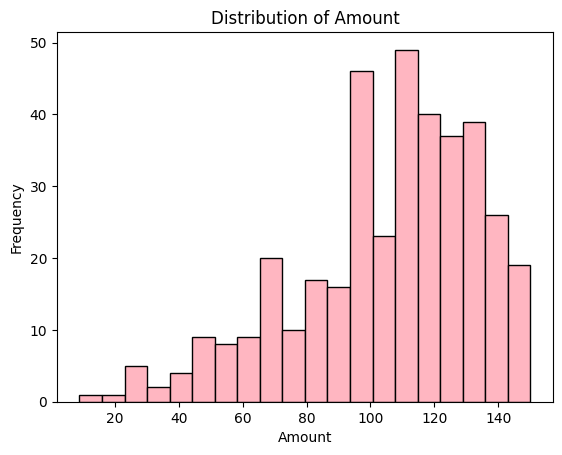

In [ ]:
plt.hist(df['LoanAmount'], bins=20, color='lightpink', edgecolor='black')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Amount')
plt.show()

we can infer that the distribution of loan amounts is moderately left-skewed, indicating that there are more applicants with lower loan amounts. Additionally, the distribution has slightly less peakedness and thinner tails compared to a normal distribution, suggesting that it is somewhat less concentrated around the mean and has fewer extreme values.

In [ ]:
mean = np.mean(df['LoanAmount'])
std_dev = np.std(df['LoanAmount'])
skewness = np.mean((df['LoanAmount'] - mean) ** 3) / (std_dev ** 3)
kurtosis = np.mean((df['LoanAmount'] - mean) ** 4) / (std_dev ** 4) - 3


print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

Skewness: -0.80
Kurtosis: 0.21


Skewness (-0.80): Skewness measures the asymmetry of the distribution. A negative skewness value (-0.80 in this case) indicates that the distribution is skewed to the left. This means that the tail of the distribution extends more towards the lower loan amounts, while the majority of loan amounts are concentrated towards the higher end.

Kurtosis (0.21): Kurtosis measures the thickness of the tail of the distribution relative to the tails of a normal distribution. A kurtosis value of 0.21 indicates that the distribution has slightly less peakedness and slightly thinner tails compared to a normal distribution (which has a kurtosis of 0). This suggests that the distribution of loan amounts is relatively more dispersed, with fewer extreme values compared to a normal distribution

Kernel Plot

The kernel density plot of Applicant income provides a smooth estimate of the probability density function of revenue values, revealing the distribution of the data. Peaks indicate densely concentrated regions, while the width of the curve indicates data variability. The symmetry of the distribution can be inferred from the shape, and the height of the curve at any point represents the relative density of the data points.





<ipython-input-14-4367671bda49>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['ApplicantIncome'], color='lightgreen', shade=True)


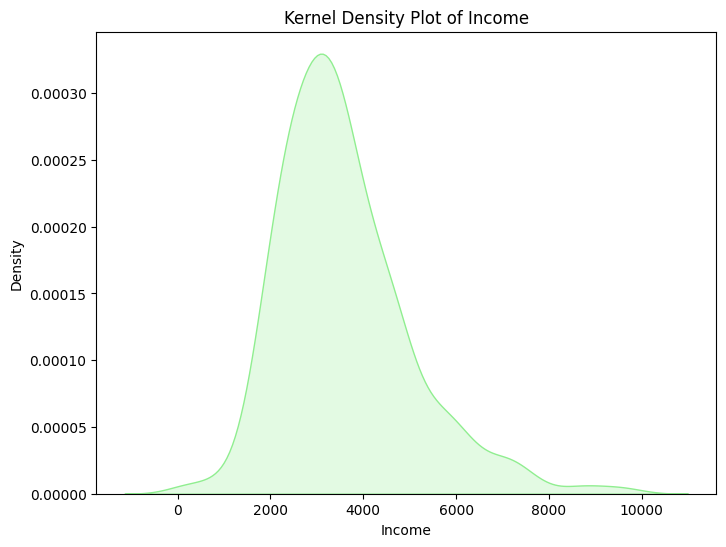

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['ApplicantIncome'], color='lightgreen', shade=True)
plt.xlabel('Income')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Income')
plt.show()

he distribution is almost symmetrical, slightly skewed to the right.
The distribution is flatter and has thinner tails compared to a normal distribution, indicating fewer extreme values.
And most frequentlu occuring amount are between Rs.2000000-3000000

In [ ]:
mean = np.mean(df['ApplicantIncome'])
std_dev = np.std(df['ApplicantIncome'])
skewness = np.mean((df['ApplicantIncome'] - mean) ** 3) / (std_dev ** 3)
kurtosis = np.mean((df['ApplicantIncome'] - mean) ** 4) / (std_dev ** 4) - 3


print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

Skewness: 1.12
Kurtosis: 2.02


Skewness (1.12): Skewness measures the asymmetry of the distribution. A positive skewness value (1.12 in this case) indicates that the distribution is skewed to the right. This means that the tail of the distribution extends more towards the higher values, while the majority of the values are concentrated towards the lower end.

Kurtosis (2.02): Kurtosis measures the peakedness of the distribution and the presence of outliers. A kurtosis value of 2.02 suggests that the distribution is leptokurtic, meaning it has heavier tails and is more peaked compared to a normal distribution (which has a kurtosis of 0). This indicates that there might be more outliers or extreme values present in the dataset compared to a normal distribution.

### **Categorical Variables:**

Display frequency tables:

In [ ]:
property_area_freq = df['Property_Area'].value_counts(normalize=True)
print(property_area_freq)

Semiurban    0.391076
Urban        0.330709
Rural        0.278215
Name: Property_Area, dtype: float64


Visualize using bar plots

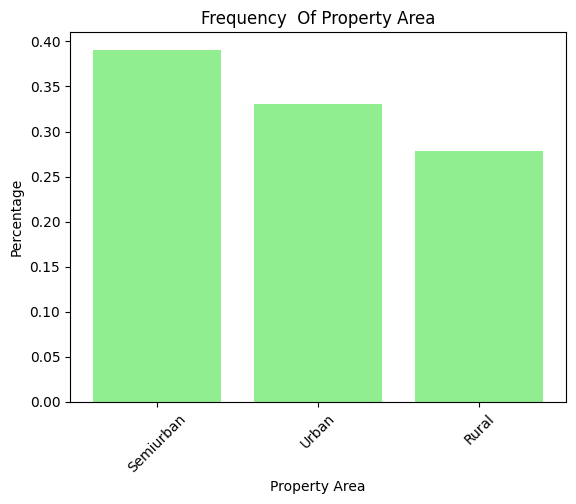

In [ ]:
plt.bar(property_area_freq.index, property_area_freq.values, color='lightgreen')
plt.xlabel('Property Area')
plt.ylabel('Percentage')
plt.title('Frequency  Of Property Area')
plt.xticks(rotation=45)
plt.show()

The bar plot illustrates the frequency distribution of property areas, with each bar representing a specific property area and its height indicating the percentage of occurrences. By examining the plot, one can easily discern the most common property areas as well as any disparities in distribution among different categories. The visualization serves as a succinct representation of the data, enabling quick identification of trends, outliers, or patterns within the property area dataset., we clearly see that semiurban has the highest frequency in the dataset

Visualizing using Kernel Density Plot

<ipython-input-19-df23f9318512>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data= property_area_freq.values, color='orange', shade=True)


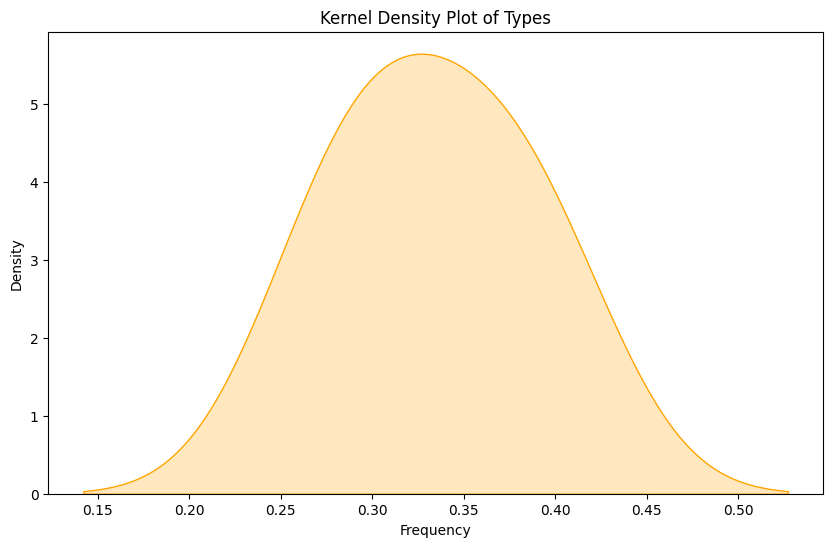

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data= property_area_freq.values, color='orange', shade=True)
plt.xlabel('Frequency')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Types')
plt.show()

The curve shows symmetry and the density is  more between the areas 0.30-0.40

### **Bivariate Analysis:**

* Explore relationships between pairs of numerical variables:

Calculate correlation coefficients between numerical variables:

In [ ]:
df1.corr()

<ipython-input-20-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.243677    0.267628   
CoapplicantIncome        -0.243677           1.000000    0.123028   
LoanAmount                0.267628           0.123028    1.000000   
Loan_Amount_Term         -0.099571          -0.004158    0.135069   
Credit_History            0.030307           0.012715   -0.043853   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.099571        0.030307  
CoapplicantIncome         -0.004158        0.012715  
LoanAmount                 0.135069       -0.043853  
Loan_Amount_Term           1.000000        0.015269  
Credit_History             0.015269        1.000000

In [ ]:
amount=df.groupby('Property_Area').sum()
amount

<ipython-input-21-89101e63dbd3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  amount=df.groupby('Property_Area').sum()


ApplicantIncome  CoapplicantIncome  LoanAmount  \
Property_Area                                                   
Rural                   398990      135143.120001     11688.0   
Semiurban               521584      183230.000000     15914.0   
Urban                   443347      168268.799988     12398.0   

               Loan_Amount_Term  Credit_History  
Property_Area                                    
Rural                   35904.0            78.0  
Semiurban               51180.0           119.0  
Urban                   39036.0            97.0

<ipython-input-34-effb445d3340>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


Text(0.5, 1.0, 'Correlation between different fearures')

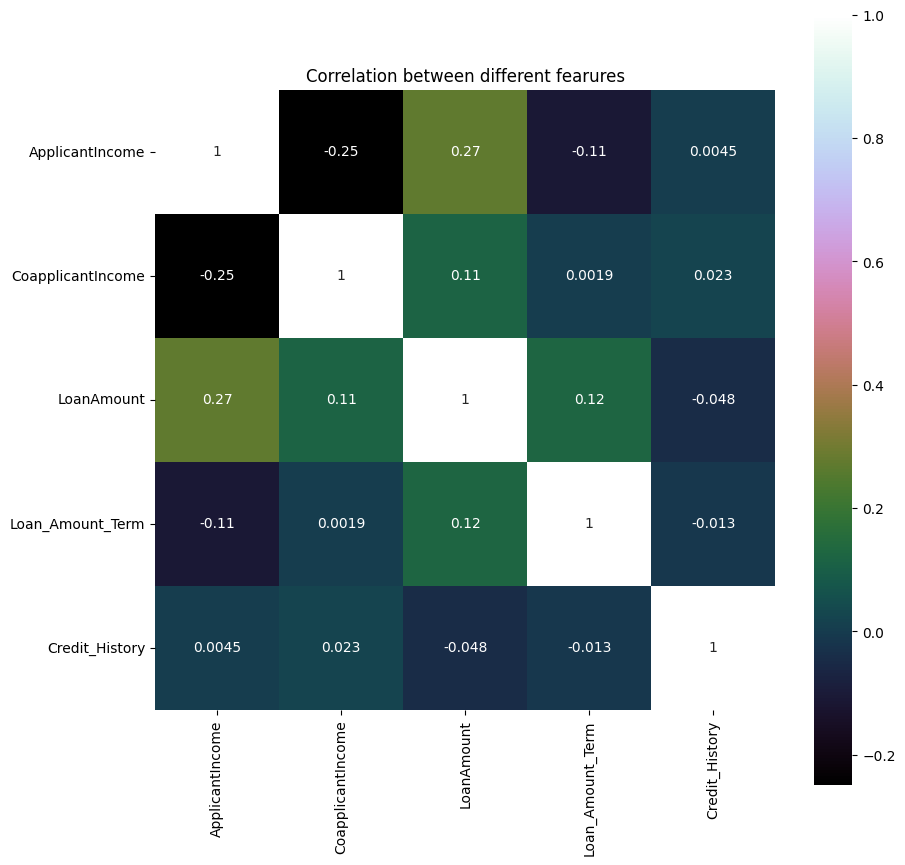

In [ ]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

In [ ]:
df['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [ ]:
groupby_type=df.groupby('Property_Area').mean()
groupby_type

<ipython-input-23-4d1c61bb6d8d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupby_type=df.groupby('Property_Area').mean()


ApplicantIncome  CoapplicantIncome  LoanAmount  \
Property_Area                                                   
Rural              3764.056604        1274.935094  110.264151   
Semiurban          3500.563758        1229.731544  106.805369   
Urban              3518.626984        1335.466667   98.396825   

               Loan_Amount_Term  Credit_History  
Property_Area                                    
Rural                345.230769        0.804124  
Semiurban            348.163265        0.856115  
Urban                328.033613        0.843478

In [ ]:
Rural=groupby_type['LoanAmount'].Rural
Semiurban=groupby_type['LoanAmount'].Semiurban
Urban=groupby_type['LoanAmount'].Urban



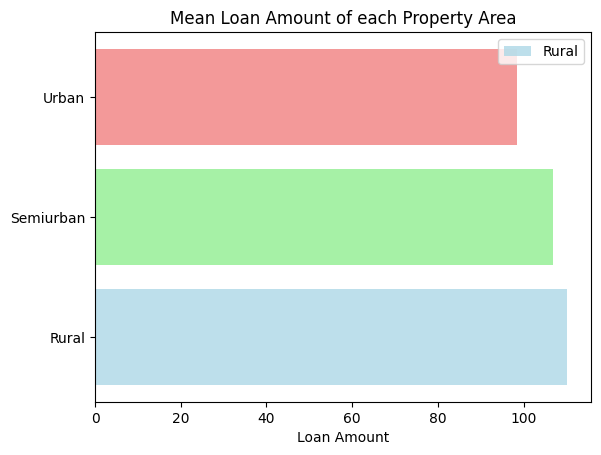

In [ ]:
type_name = ('Rural', 'Semiurban', 'Urban')
types = (Rural, Semiurban, Urban)  # Assuming these variables are defined elsewhere

y_pos = np.arange(len(type_name))

# Assigning colors to each bar
colors = ['lightblue', 'lightgreen', 'lightcoral']

plt.barh(y_pos, types, color=colors, align='center', alpha=0.8)

plt.xlabel('Loan Amount')
plt.title('Mean Loan Amount of each Property Area')

# Adding legends
legend_labels = ['Rural', 'Semiurban', 'Urban']
plt.legend(legend_labels)

plt.yticks(y_pos, type_name)
plt.show()

Clearly we see that rural has the highest   mean loan amount

In [ ]:
df_drop=df.drop(labels=['Loan_ID','Gender'	,'Married'	,'Dependents',	'Education',	'Self_Employed', 'Loan_Status'],axis=1)
df_drop.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0       128.0             360.0   
1             3000                0.0        66.0             360.0   
2             2583             2358.0       120.0             360.0   
3             6000                0.0       141.0             360.0   
4             2333             1516.0        95.0             360.0   

   Credit_History Property_Area  
0             1.0         Rural  
1             1.0         Urban  
2             1.0         Urban  
3             1.0         Urban  
4             1.0         Urban

In [ ]:
cols = df_drop.columns.tolist()
cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [ ]:
cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [ ]:
df_drop = df_drop.reindex(columns= cols)

In [ ]:
df_drop.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0       128.0             360.0   
1             3000                0.0        66.0             360.0   
2             2583             2358.0       120.0             360.0   
3             6000                0.0       141.0             360.0   
4             2333             1516.0        95.0             360.0   

   Credit_History Property_Area  
0             1.0         Rural  
1             1.0         Urban  
2             1.0         Urban  
3             1.0         Urban  
4             1.0         Urban

In [ ]:
X = df_drop[['ApplicantIncome',	'CoapplicantIncome',	'LoanAmount']]
y = df_drop[['Loan_Amount_Term'	,'Credit_History',	'Property_Area']]

In [ ]:
X.shape

(381, 3)

In [ ]:
y.shape

(381, 3)

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)


**Conventional Method of PCA** (without scikit-learn)

Computing Eigenvectors and Eigenvalues:

Before computing Eigen vectors and values we need to calculate covariance matrix.

Covariance matrix

In [ ]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00263158 -0.24934751  0.27139379]
 [-0.24934751  1.00263158  0.11523892]
 [ 0.27139379  0.11523892  1.00263158]]


Alternate Method:

Equivalently we could have used Numpy np.cov to calculate covariance matrix

In [ ]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00263158 -0.24934751  0.27139379]
 [-0.24934751  1.00263158  0.11523892]
 [ 0.27139379  0.11523892  1.00263158]]


**Eigen decomposition of the covariance matrix**

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.6502659  -0.75899978 -0.03276571]
 [-0.52389893  0.41677691  0.74285053]
 [ 0.5501674  -0.50021629  0.66865499]]

Eigenvalues 
[0.57212321 1.3184128  1.11735873]


6). Selecting Principal Components

T In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues:
The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.3184127984831207
1.1173587279119264
0.5721232104470613


Explained Variance

After sorting the eigenpairs, the next question is "how many principal components are we going to choose for our new feature subspace?"
A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues.
The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

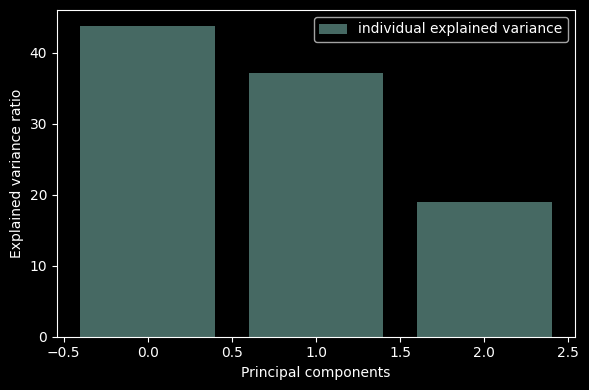

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(3), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

The plot above clearly shows that maximum variance (somewhere around 26%) can be explained by the first principal component alone.
The second,third,fourth and fifth principal component share almost equal amount of information.Comparatively 6th and 7th components share less amount of information as compared to the rest of the Principal components.
But those information cannot be ignored since they both contribute almost 17% of the data.
But we can drop the last component as it has less than 10% of the variance

Projection Matrix

The construction of the projection matrix that will be used to transform the Human resouces analytics data onto the new feature subspace.

Suppose only 1st and 2nd principal component shares the maximum amount of information say around 90%.Hence we can drop other components.

Here, we are reducing the 7-dimensional feature space to a 2-dimensional feature subspace, by choosing the “top 2” eigenvectors with the highest eigenvalues to construct our d×k-dimensional eigenvector matrix W

In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1),
                      eig_pairs[1][1].reshape(3,1)
                    ))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.75899978 -0.03276571]
 [ 0.41677691  0.74285053]
 [-0.50021629  0.66865499]]


Projection onto the New Feature Space

In this last step we will use the 7×2-dimensional projection matrix W to transform our samples onto the new subspace via the equation Y=X×W

In [ ]:
Y = X_std.dot(matrix_w)
Y

array([[-9.02298015e-01,  5.93467676e-01],
       [ 7.71260312e-01, -1.31294060e+00],
       [ 4.61099148e-01,  7.20905126e-01],
       [-2.15924753e+00,  3.88461876e-01],
       [ 8.86362005e-01, -1.31117037e-01],
       [ 7.18352527e-01, -1.00068877e+00],
       [ 6.07462137e-01,  2.98514943e-01],
       [ 1.04375869e+00,  7.49277922e-01],
       [ 2.74083516e+00, -2.08541696e+00],
       [-1.31460776e+00,  3.49702183e-02],
       [-1.48282726e-01, -5.23983775e-01],
       [ 3.21645143e-01, -1.08862880e+00],
       [-1.42218306e+00,  2.25303442e-01],
       [ 7.43908254e-01,  9.65350191e-01],
       [-2.39430925e+00, -5.23455212e-01],
       [ 4.42956453e-01,  4.84033146e-01],
       [ 1.05185978e-01,  3.73823536e-01],
       [ 2.91434630e-01,  7.29767994e-01],
       [-4.76718557e-01,  2.80294736e-02],
       [ 2.15275590e+00, -2.00883867e+00],
       [-2.12599963e-01,  6.06553255e-01],
       [ 5.40570635e-01, -1.12792217e+00],
       [-8.40922956e-01, -4.07651865e-01],
       [-4.

In [ ]:
Y.shape

(381, 2)

Alternate (best) Method

PCA with scikit-learn

In [ ]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=1)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [ ]:
print(Y_sklearn)

[[-9.02298015e-01]
 [ 7.71260312e-01]
 [ 4.61099148e-01]
 [-2.15924753e+00]
 [ 8.86362005e-01]
 [ 7.18352527e-01]
 [ 6.07462137e-01]
 [ 1.04375869e+00]
 [ 2.74083516e+00]
 [-1.31460776e+00]
 [-1.48282726e-01]
 [ 3.21645143e-01]
 [-1.42218306e+00]
 [ 7.43908254e-01]
 [-2.39430925e+00]
 [ 4.42956453e-01]
 [ 1.05185978e-01]
 [ 2.91434630e-01]
 [-4.76718557e-01]
 [ 2.15275590e+00]
 [-2.12599963e-01]
 [ 5.40570635e-01]
 [-8.40922956e-01]
 [-4.69717077e-02]
 [ 1.03520676e+00]
 [-7.03313284e-01]
 [-1.08893877e-01]
 [ 2.02820985e-01]
 [ 1.96543445e+00]
 [ 9.33468084e-01]
 [-5.17004547e-01]
 [-6.65906381e-01]
 [ 1.63226235e-01]
 [-2.58126855e-01]
 [-2.11641915e+00]
 [ 6.20812550e-01]
 [-7.36083659e-01]
 [ 1.03765921e+00]
 [-2.28534803e-01]
 [-6.99597087e-01]
 [-1.29478445e+00]
 [ 5.88087256e-01]
 [ 9.89662150e-01]
 [-2.51127147e-01]
 [-2.87782187e-01]
 [ 7.61896409e-01]
 [ 1.72883224e-01]
 [-7.35988139e-01]
 [ 6.31670176e-03]
 [-2.46545957e+00]
 [-1.16096048e+00]
 [ 1.16019884e+00]
 [ 2.3868673

In [ ]:
Y_sklearn.shape

(381, 1)


Conclusion:

Thus Principal Component Analysis is used to remove the redundant features from the datasets without losing much information.These features are low dimensional in nature.

The first component has the highest variance followed by second, third and so on.

PCA works best on dataset having 3 or higher dimensions.

Because, with higher dimensions, it becomes increasingly difficult to make interpretations from the resultant cloud of data.

